# <font color='orange'>1. Import libraries </font>

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot
import cufflinks as cf
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import NearestCentroid
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=ConvergenceWarning)

cf.go_offline()

# <font color='orange'>2. Reading data</font>

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

- Show describe for data

In [3]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

- Show data info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Check for the data type in TotalCharges column

In [5]:
# Check the data types in the 'TotalCharges' column
unique_data_types = df['TotalCharges'].apply(type).unique()

print(unique_data_types)

[<class 'str'>]


- Convert datatypes of Totalcharges column to float64

In [6]:
"""
Convert 'TotalCharges' column to float64
The errors='coerce' parameter ensures that if there are any values that cannot be converted to numeric, 
they will be replaced with NaN (missing value). 
"""
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

- Check for missing values

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [8]:
# Replace missing values with NaN
df.fillna(np.nan, inplace=True)

# Create a SimpleImputer object
imputer = SimpleImputer(strategy='mean')

# Impute missing values in numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Impute missing values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


- Sort data by `TotalCharges` in descending order

In [9]:
df.sort_values(by='TotalCharges', ascending=False, inplace=True)

- Group data by 'Contract' type and calculate mean 'MonthlyCharges'

In [10]:
grouped_data = df.groupby('Contract')['MonthlyCharges'].mean().reset_index()

In [11]:
grouped_data

Contract  MonthlyCharges
0  Month-to-month       66.398490
1        One year       65.048608
2        Two year       60.770413

- Convert all string df to lowercase to ensure consistency

In [12]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.lower()

# <font color='orange'>3. Visualization</font>  

## <font color='orange'>3.1 Line Plot</font>

- Tenure: This column represents the length of time (in months) that a customer has been with the telecom company. It indicates the duration of the customer's subscription or contract.
- MonthlyCharges: This column represents the amount charged to the customer on a monthly basis for the telecom services they subscribe to. It includes charges for services such as internet, phone, and TV packages

Visualize `tenure` `MonthlyCharges` by *Line Plot*, we can visually explore how monthly charges change as the customer's tenure increases.

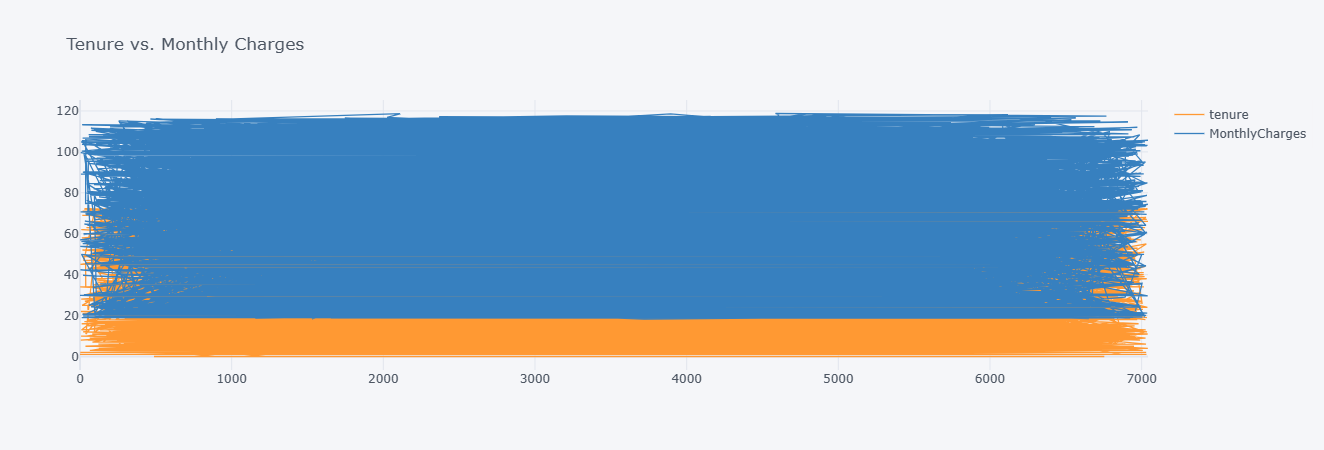

In [13]:
line_plot = df[['tenure', 'MonthlyCharges']].iplot(kind='line', title='Tenure vs. Monthly Charges')

## <font color='orange'>3.2 Area Plot</font>

- `Churn` This column likely represents whether a customer churned (cancelled their service) or not.
`Yes` indicates that the customer has churned.
`No` indicates that the customer is still active.
- By counting the occurrences of each value in the 'Churn' column, you get a count of how many customers have churned ('Yes') and how many are still active ('No'). The resulting counts are then visualized in the area plot.

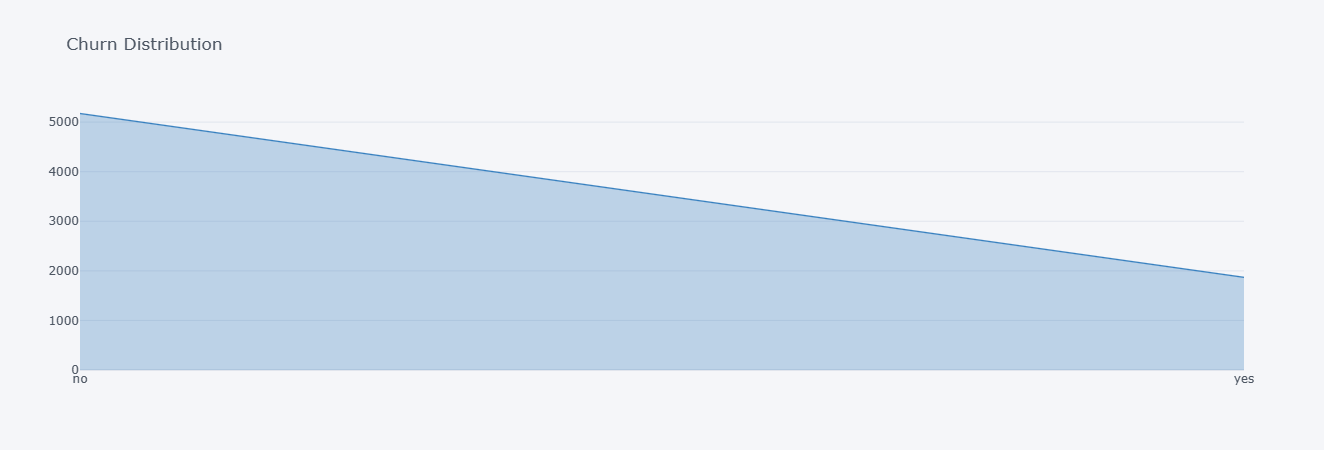

In [14]:
area_plot = df['Churn'].value_counts().iplot(kind='area', title='Churn Distribution', fill=True, color='blue')

## <font color='orange'>3.3 Histogram Plot</font>

- MonthlyCharges: This column represents the amount charged to the customer on a monthly basis for the telecom services they subscribe to. It includes charges for services such as internet, phone, and TV packages.

By plotting a histogram of the 'MonthlyCharges' column, you get a visual representation of how these charges are distributed across the customer base.

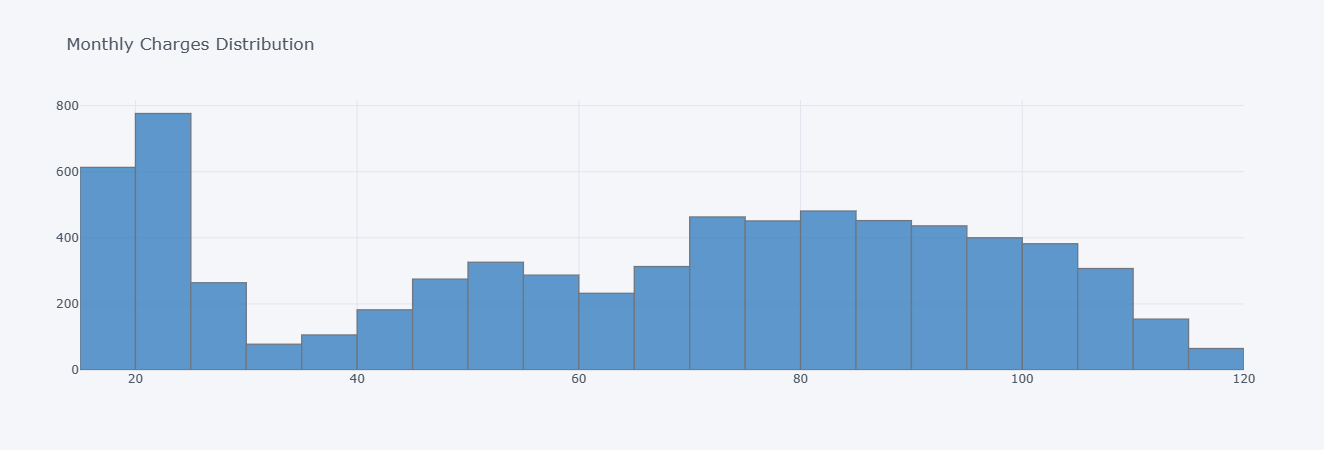

In [15]:
histogram = df['MonthlyCharges'].iplot(kind='hist', bins=50, title='Monthly Charges Distribution', color='blue')

## <font color='orange'>3.4 Pie Chart</font>

- `Contract` The type of contract each customer has with the telecom company. Contract types could include `Month-to-month`, `One year`, and  `Two year`.

By creating a pie chart with the 'Contract' column, you can visualize the distribution of contract types among the customers.

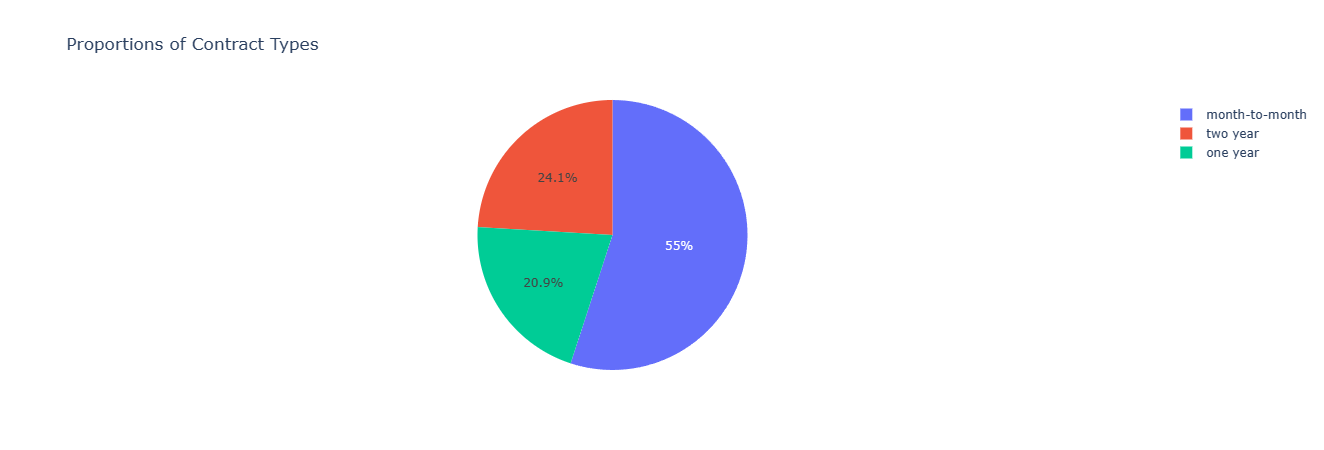

In [16]:
fig = px.pie(data_frame=df, names='Contract', title='Proportions of Contract Types')
fig.show()

## <font color='orange'>3.5 Bar Chart</font>

- `Contract` The type of contract each customer has with the telecom company. Contract types could include `Month-to-month`, `One year`, and  `Two year`.

The bar chart displays each contract type as a separate bar along the x-axis. The height of each bar represents the frequency or count of customers with that specific contract type.

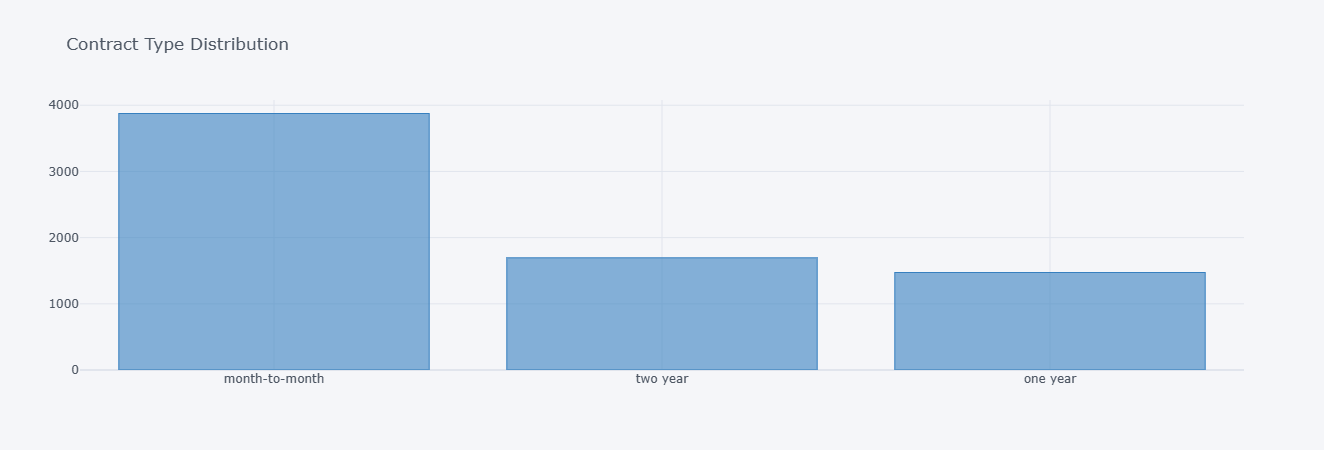

In [17]:
bar_chart = df['Contract'].value_counts().iplot(kind='bar', title='Contract Type Distribution', color='blue')

## <font color='orange'>3.6 Box Plot</font>

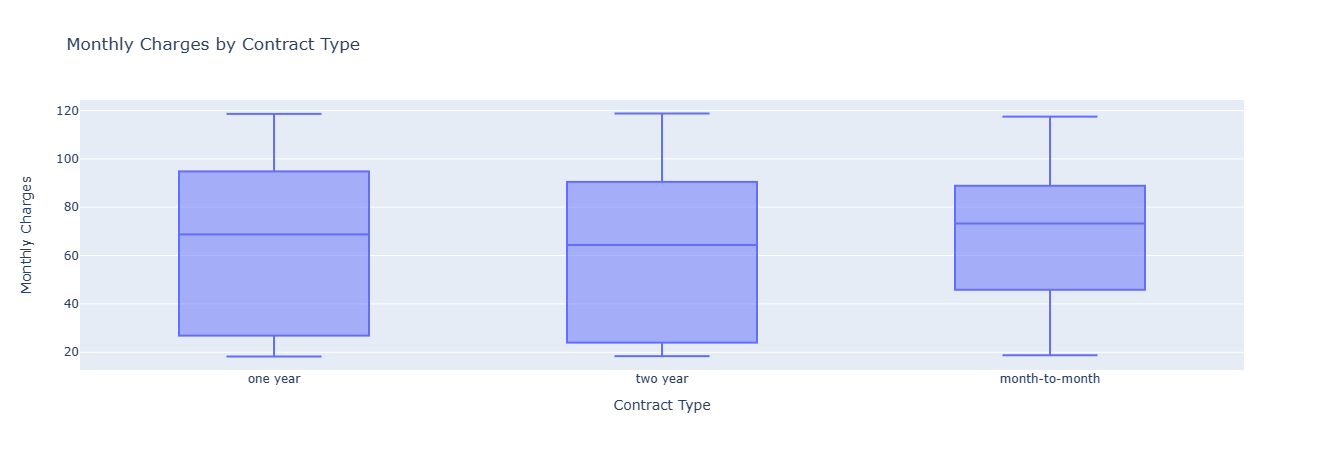

In [18]:
box_plot = px.box(df, x='Contract', y='MonthlyCharges', title='Monthly Charges by Contract Type', 
                  labels={'Contract': 'Contract Type', 'MonthlyCharges': 'Monthly Charges'})
# Show the plot
box_plot.show()

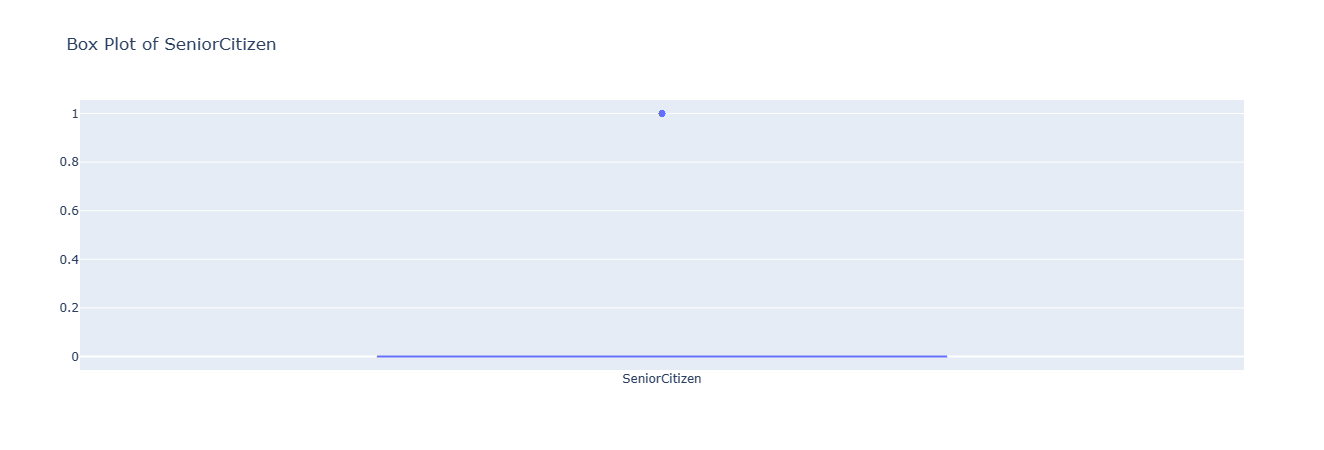

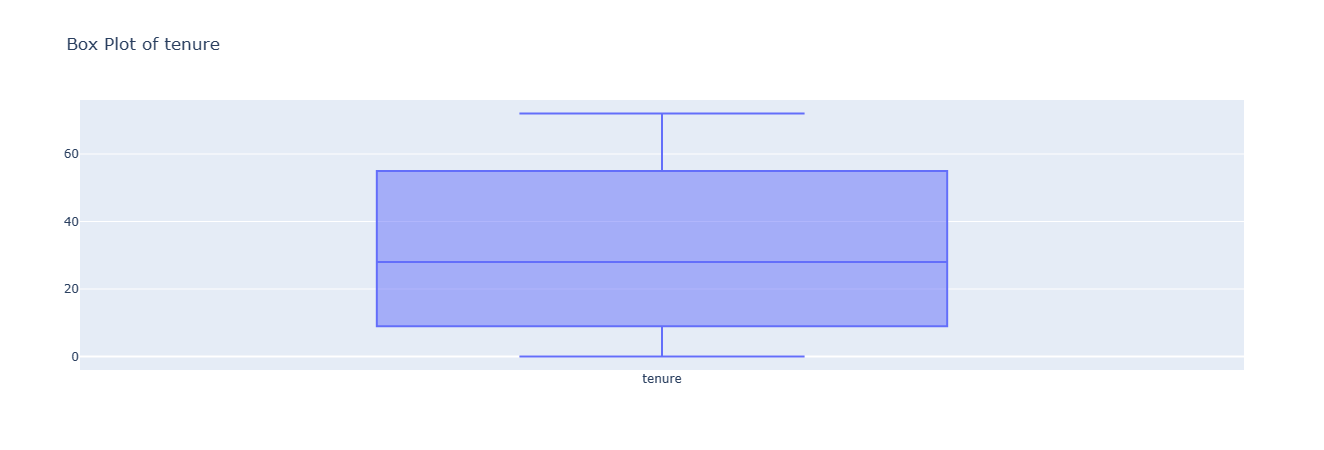

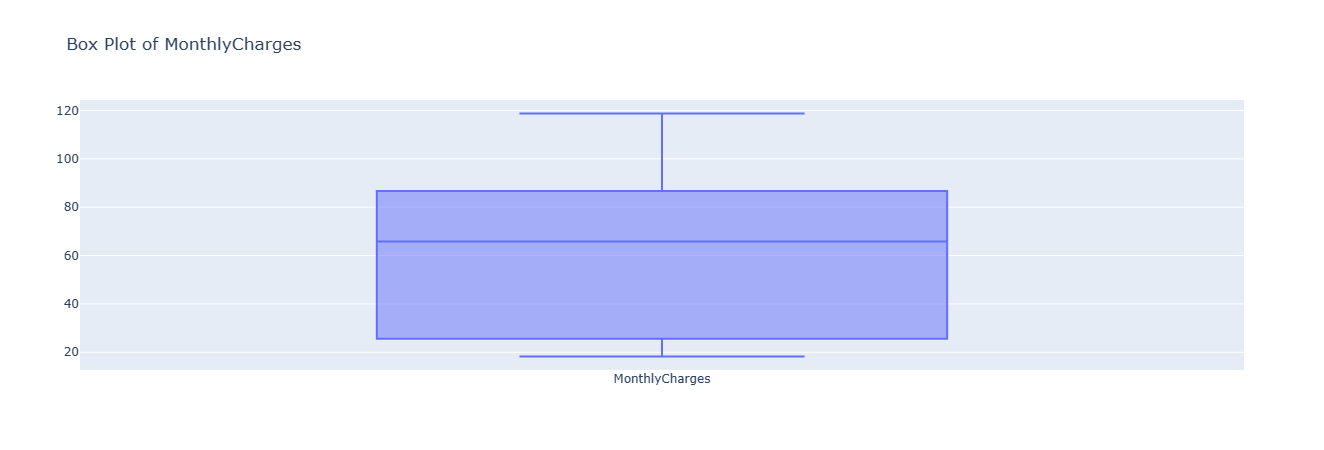

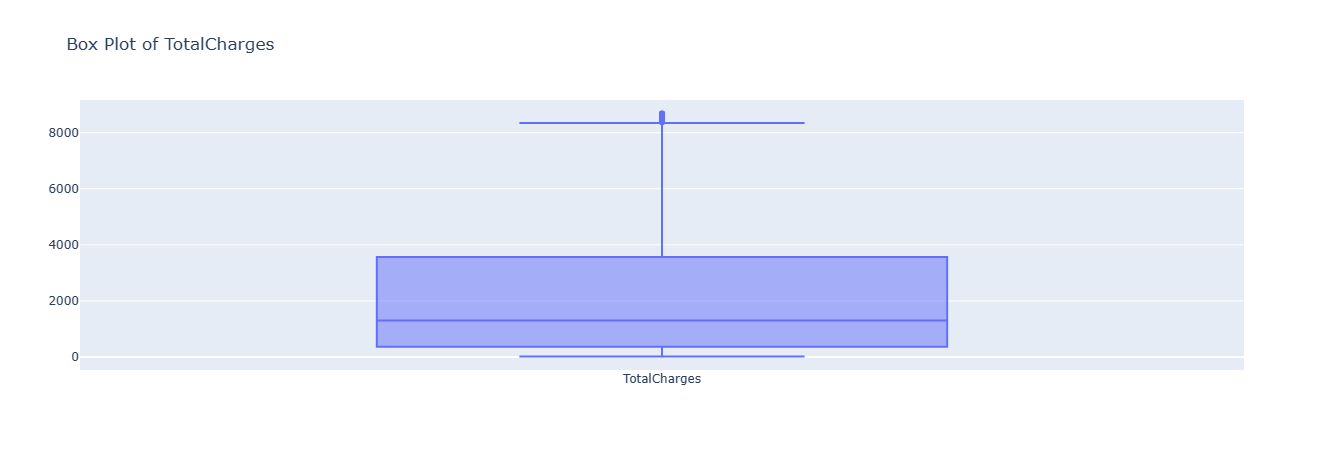

In [19]:
# Create a box plot for each numeric column
for column in df.select_dtypes(include=['number']):
  fig = go.Figure(data=[go.Box(y=df[column], name=column)])
  fig.update_layout(title=f'Box Plot of {column}')
  fig.show()

  # Remove outliers based on the box plot
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5882 entries, 6728 to 1654
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5882 non-null   object 
 1   gender            5882 non-null   object 
 2   SeniorCitizen     5882 non-null   float64
 3   Partner           5882 non-null   object 
 4   Dependents        5882 non-null   object 
 5   tenure            5882 non-null   float64
 6   PhoneService      5882 non-null   object 
 7   MultipleLines     5882 non-null   object 
 8   InternetService   5882 non-null   object 
 9   OnlineSecurity    5882 non-null   object 
 10  OnlineBackup      5882 non-null   object 
 11  DeviceProtection  5882 non-null   object 
 12  TechSupport       5882 non-null   object 
 13  StreamingTV       5882 non-null   object 
 14  StreamingMovies   5882 non-null   object 
 15  Contract          5882 non-null   object 
 16  PaperlessBilling  5882 non-null   object 
 1

As shown in MontlyCharges
- Min: 18.25
- Max: 118.75
- Median: 65.8

## <font color='orange'>3.7 Scatter Plot</font>

The scatter plot allows you to visually assess if there's any correlation or pattern between the monthly charges and total charges for customers. For example, you can observe if customers with higher monthly charges tend to have higher total charges over time or if there's no clear relationship between the two variables. This information can be valuable for understanding customer spending behavior and informing pricing strategies or customer retention efforts.

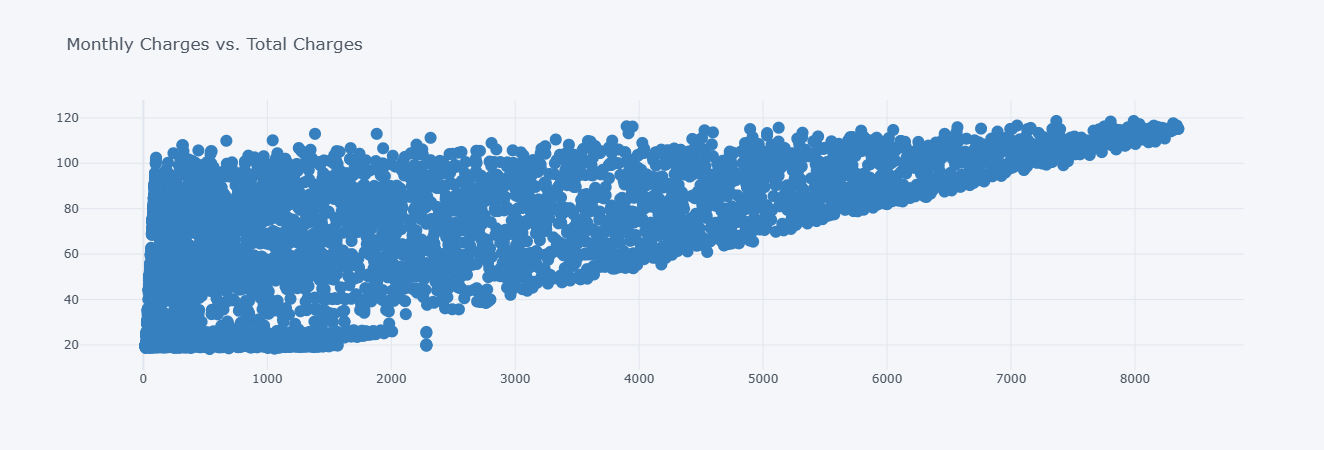

In [21]:
scatter_plot = df[['TotalCharges', 'MonthlyCharges']].iplot(kind='scatter', x='TotalCharges', y='MonthlyCharges', mode='markers', title='Monthly Charges vs. Total Charges',color='blue')

## <font color='orange'>3.8 Bubble Plot</font>

The bubble plot allows you to simultaneously assess the relationship between total charges, monthly charges, and customer tenure. For example, you can observe if customers with higher monthly charges tend to have higher total charges over time, and if there's any correlation between the tenure of a customer and their charges. Additionally, the size of the bubbles provides insight into the distribution of customer tenures within different ranges of total and monthly charges. This information can be valuable for understanding customer behavior and informing business decisions related to pricing, customer retention, and loyalty programs.

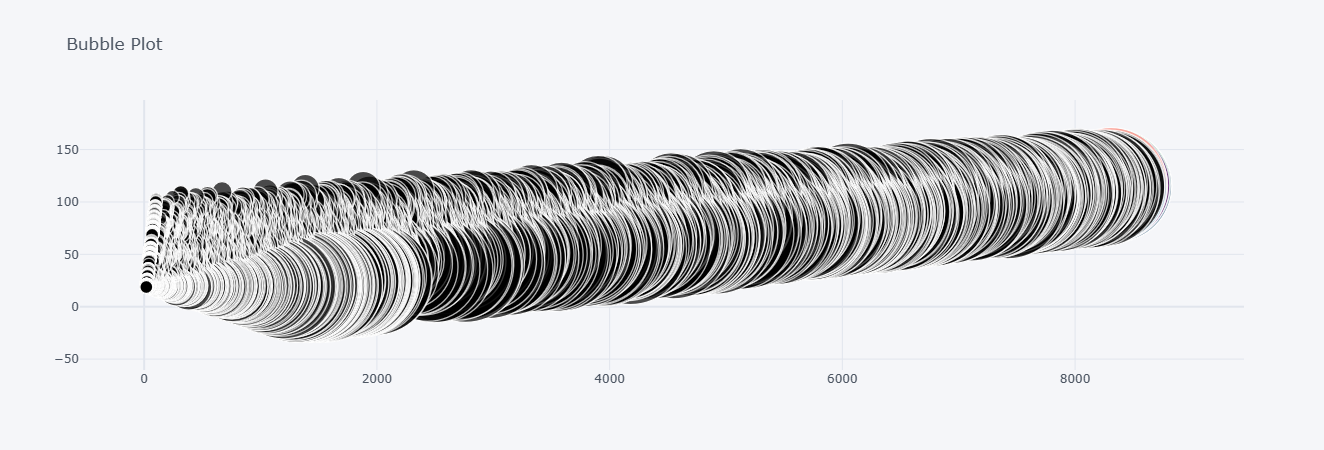

In [22]:
# Bubble Plot
bubble_plot = df[['TotalCharges', 'MonthlyCharges', 'tenure']].iplot(kind='bubble', x='TotalCharges', y='MonthlyCharges', size='tenure', title='Bubble Plot')

# <font color='orange'>4. Choose the regression and classificcation attributes</font>

In [23]:
# Drop the customerId column (unwanted attribute) and churn column (Classification column)
data = df.drop(columns=['customerID', 'Churn'])

# Select a churn column to be the classification label
y_classification = df['Churn']

# Display remaining columns with there datatypes
data.dtypes

gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

**Calculate correlation between non-boolean numerical features**

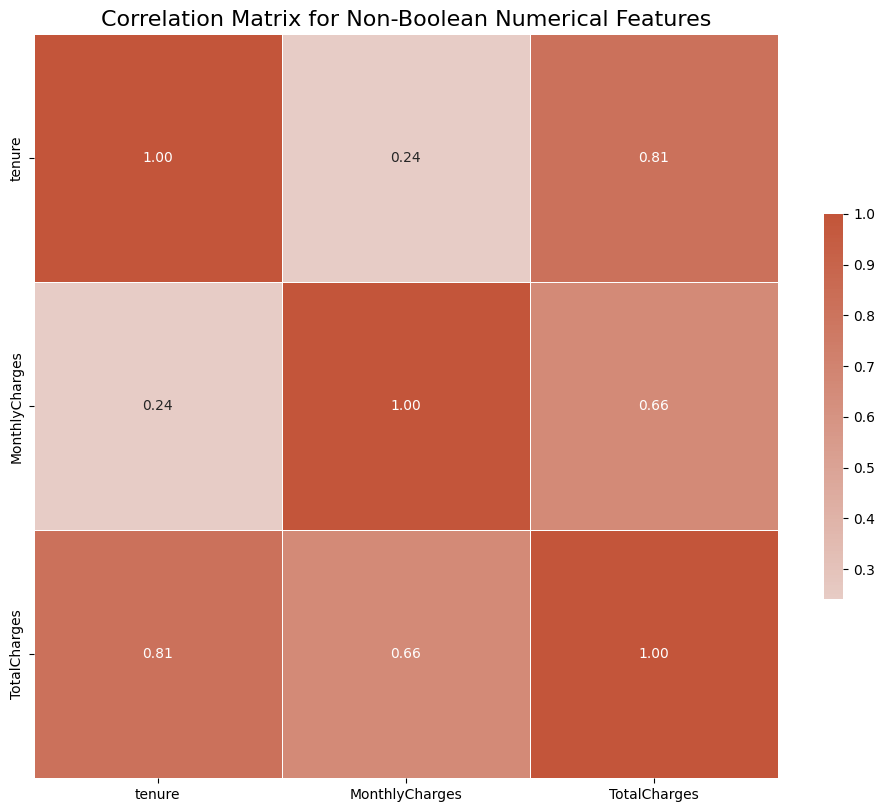

In [24]:
non_boolean_numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Calculate the correlation matrix for non-boolean numerical features
corr_matrix = data[non_boolean_numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix for Non-Boolean Numerical Features', fontsize=16)
plt.show()

In a regression problem, you typically want to select features (independent variables) that have a strong linear 
relationship with the target variable (dependent variable). In this case, predicting 'TotalCharges' based on 'tenure' and 'MonthlyCharges' 
would be a better choice

In [25]:
# Take a total charge as the regression variable
y_regression = data['TotalCharges']

# Drop the total charge from data
data.drop(columns=['TotalCharges'], inplace=True)

# <font color='orange'>5. Preparing data to the model</font>

**Divide data to train, test, validation sets**

In [26]:
# Divide data to a test and temporaray
x_temp, x_test, y_temp_classification, y_test_classification, y_temp_regression, y_test_regression = train_test_split(
    data,
    y_classification,
    y_regression,
    test_size=0.15,
    random_state= 42
)

# Divide the temporary to train and validation
x_train, x_val, y_train_classification, y_val_classification, y_train_regression, y_val_regression = train_test_split(
    x_temp,
    y_temp_classification,
    y_temp_regression,
    test_size=0.25,
    random_state= 42
)

In [27]:
print("The number of entries in train set is:", x_train.shape[0])
print("The number of labels in train set is:",y_train_classification.shape[0])
print("The number of regression variables in train set is:",y_train_regression.shape[0])
print()
print("The number of entries in validation set is:", x_val.shape[0])
print("The number of labels in validation set is:",y_val_classification.shape[0])
print("The number of regression variables in validation set is:",y_val_regression.shape[0])
print()
print("The number of entries in test set is:", x_test.shape[0])
print("The number of labels in test set is:",y_test_classification.shape[0])
print("The number of regression variables in test set is:",y_test_regression.shape[0])

The number of entries in train set is: 3749
The number of labels in train set is: 3749
The number of regression variables in train set is: 3749

The number of entries in validation set is: 1250
The number of labels in validation set is: 1250
The number of regression variables in validation set is: 1250

The number of entries in test set is: 883
The number of labels in test set is: 883
The number of regression variables in test set is: 883


**One hot encoding to non-numeric columns**

In [28]:
# Get list of non-numeric features
non_numeric_features = data.select_dtypes(exclude=['number']).columns.tolist()

non_numeric_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [29]:
column_transformer = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), non_numeric_features),  # Apply OneHotEncoder to non-numeric columns
    ],
    remainder='passthrough'  # Remain other columns unchanged
)

In [30]:
# Fitting normaliztion transformer to training data
column_transformer.fit(x_train)

# Convert all inputs data
x_train_encoded = column_transformer.transform(x_train)
x_val_encoded =  column_transformer.transform(x_val)
x_test_encoded =  column_transformer.transform(x_test)

In [31]:
x_train_encoded.shape

(3749, 44)

In [32]:
x_train_encoded[0]

array([  1.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ,   1.  ,
         0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ,   1.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,
         0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   0.  ,  61.  , 101.05])

**Scaling and normalization for data**

Column transformer with `normalization`

In [33]:
column_transformer_normalization = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), non_numeric_features),  # Apply OneHotEncoder to non-numeric columns
        ('min_max_scaler', MinMaxScaler(), ['tenure', 'MonthlyCharges'])   # Apply MinMaxScaler to non-boolean-numeric features
    ],
    remainder='passthrough'  # Remain other columns unchanged
)

Column transformer with `Scaling`

In [34]:
column_transformer_scaling = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), non_numeric_features),  # Apply OneHotEncoder to non-numeric columns
        ('standard_scaler', StandardScaler(), ['tenure', 'MonthlyCharges'])   # Apply standard to non-boolean-numeric features
    ],
    remainder='passthrough'  # Remain other columns unchanged
)

**Making transformations**

Making one hot encoding and normalization [0:1]

In [35]:
# Fitting normaliztion transformer to training data
column_transformer_normalization.fit(x_train)

# Convert all inputs data
x_train_norm = column_transformer_normalization.transform(x_train)
x_val_norm =  column_transformer_normalization.transform(x_val)
x_test_norm =  column_transformer_normalization.transform(x_test)

In [36]:
x_train_norm.shape

(3749, 44)

In [37]:
x_train_norm[0]

array([1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.84722222, 0.82511211, 0.        ])

Making one hot encoding and standard scaling

In [38]:
# Fitting normaliztion transformer to training data
column_transformer_scaling.fit(x_train)

# Convert all inputs data
x_train_sc = column_transformer_scaling.transform(x_train)
x_val_sc =  column_transformer_scaling.transform(x_val)
x_test_sc =  column_transformer_scaling.transform(x_test)

In [39]:
x_train_sc.shape

(3749, 44)

In [40]:
x_train_sc[0]

array([1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 1.18157571, 1.30416013, 0.        ])

**Encoding class labels**

In [41]:
# Make object from label encoder class
lbl_encoder = LabelEncoder()
# Fit the encoder on the classes
lbl_encoder.fit(y_train_classification)

# Transform all target classes
y_train_classification = lbl_encoder.transform(y_train_classification)
y_val_classification = lbl_encoder.transform(y_val_classification)
y_test_classification = lbl_encoder.transform(y_test_classification)

In [42]:
lbl_encoder.classes_

array(['no', 'yes'], dtype=object)

**Show class distribution over training set**

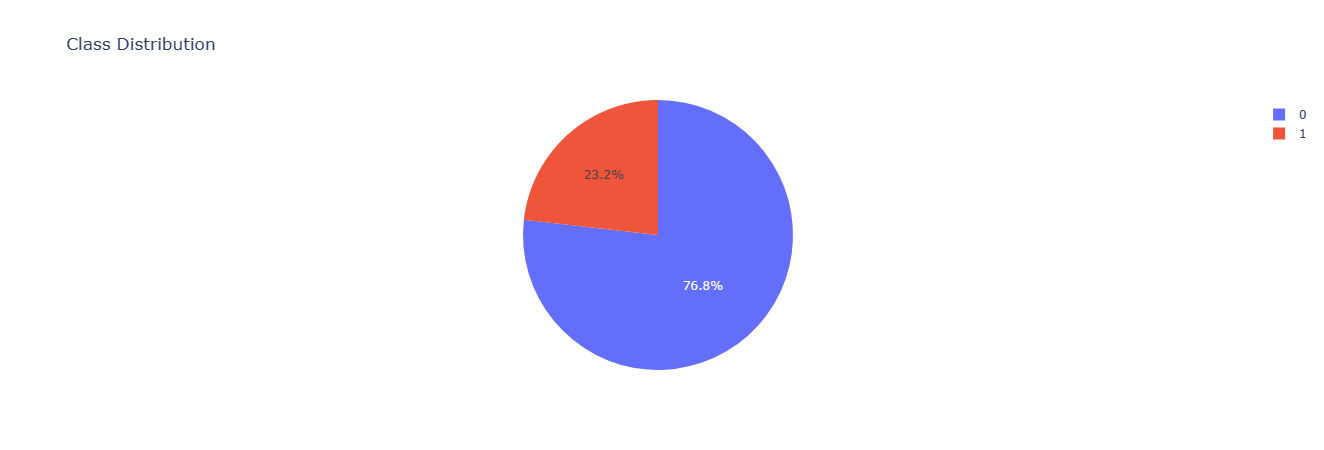

In [43]:
# Count occurrences of each class
unique_classes, counts = np.unique(y_train_classification, return_counts=True)

# Calculate percentage of each class
percentages = (counts / len(y_train_classification)) * 100

# Create a DataFrame with class and percentage
class_data = {'Class': unique_classes, 'Percentage': percentages}
class_df = pd.DataFrame(class_data)

# Create a pie chart using Plotly Express
fig = px.pie(class_df, values='Percentage', names='Class', title='Class Distribution')
fig.show()

# <font color='orange'>6. Dimensionality reduction</font>

In [44]:
# Make an instance of the Model
pca = PCA(20)

# Training the model on training normalized data
pca.fit(x_train_encoded)

# Dimensionality reduction for the inputs
x_train_red = pca.transform(x_train_encoded)
x_val_red = pca.transform(x_val_encoded)
x_test_red = pca.transform(x_test_encoded)

In [45]:
x_train_red.shape

(3749, 20)

In [46]:
x_train_red

array([[ 4.77847417e+01,  1.04542879e+01, -4.87464349e-01, ...,
        -1.95183733e-01,  3.28830606e-03,  7.76003163e-01],
       [-2.76988356e+01,  4.21446717e+01, -8.49694077e-01, ...,
        -4.74232526e-01, -6.78716161e-02,  1.57157428e-01],
       [-1.85796985e+01,  5.12108630e+01, -7.87474996e-01, ...,
        -2.12007158e-01, -2.75922353e-01, -2.23879331e-02],
       ...,
       [-2.80928468e+00, -2.60957709e+01,  5.27239741e-01, ...,
        -7.00225014e-01,  3.42210708e-01,  1.82221098e-01],
       [-1.82234596e+01, -2.24643266e+01,  8.78875615e-01, ...,
         2.88605780e-02, -8.39071985e-01,  1.14822746e-01],
       [ 4.78858034e+01,  2.71671887e+00, -7.21863270e-01, ...,
         4.86964240e-01, -1.45776210e-01, -4.33843510e-01]])

# <font color='orange'>7. Training classification models</font>

**Model evaluation function**

In [47]:
def evaluate_model(model, x_train, y_train, x_val, y_val):
    # Fitting the model on training data
    model.fit(x_train, y_train)
    
    # Make predictions about training data
    y_pred_train = model.predict(x_train)
    
    # Make prediction about validation data
    y_pred_val = model.predict(x_val)
    
    # Calculate the training accuracy
    acc_train = accuracy_score(y_train, y_pred_train)
    
    # Calculate the validation accuracy
    acc_val = accuracy_score(y_val, y_pred_val)
    
    return acc_train, acc_val

In [48]:
# To store all training results for normalized data
results_normalized = {
    'model':[],
    'acc_train_normalized':[],
    'acc_val_normalized':[]
}

# To store all training results for scaled data
results_scaled = {
    'model':[],
    'acc_train_scaled':[],
    'acc_val_scaled':[]
}

# To store all training results for reduced features data
results_red = {
    'model':[],
    'acc_train_reduced':[],
    'acc_val_reduced':[]
}

# To store all training results for normal data (only one hot encoded)
results_encoded = {
    'model':[],
    'acc_train_encoded':[],
    'acc_val_encoded':[]
}

In [49]:
# Making object for each model
bnb_clf = BernoulliNB()
lr_clf = LogisticRegression()
lrCV_clf = LogisticRegressionCV()
svc_clf = SVC()
dt_clf = DecisionTreeClassifier()
xgb_clf = XGBClassifier()
knn_clf = NearestCentroid(metric='euclidean')

# Combine estimators in one list
estimators = [
    ('BernoulliNB', BernoulliNB()),
    ('LogisticRegression', LogisticRegression()),
    ('LogisticRegressionCV', LogisticRegressionCV()),
    ('SVC', SVC()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('XGBClassifier', XGBClassifier()),
    ('KNN', knn_clf)
]

**Training the models on `normal encoded` data**

In [50]:
for name, clf in estimators:
    # Evaluate the model
    acc_train, acc_val = evaluate_model(clf, x_train_encoded,
               y_train_classification, x_val_encoded, y_val_classification)
    # Save results
    results_encoded['model'].append(name)
    results_encoded['acc_train_encoded'].append(acc_train)
    results_encoded['acc_val_encoded'].append(acc_val)
    
    print(f'{name} training accuracy: {acc_train}  validation accuracy: {acc_val}\n')

BernoulliNB training accuracy: 0.7204587890104027  validation accuracy: 0.7216

LogisticRegression training accuracy: 0.8226193651640438  validation accuracy: 0.8096

LogisticRegressionCV training accuracy: 0.8228861029607896  validation accuracy: 0.8048

SVC training accuracy: 0.8167511336356361  validation accuracy: 0.796

DecisionTreeClassifier training accuracy: 0.9975993598292878  validation accuracy: 0.7288

XGBClassifier training accuracy: 0.9637236596425713  validation accuracy: 0.772

KNN training accuracy: 0.7193918378234195  validation accuracy: 0.7192



**Training the models on `normalized` data**

In [51]:
for name, clf in estimators:
    # Evaluate the model
    acc_train, acc_val = evaluate_model(clf, x_train_norm,
               y_train_classification, x_val_norm, y_val_classification)
    # Save results
    results_normalized['model'].append(name)
    results_normalized['acc_train_normalized'].append(acc_train)
    results_normalized['acc_val_normalized'].append(acc_val)
    
    print(f'{name} training accuracy: {acc_train}  validation accuracy: {acc_val}\n')

BernoulliNB training accuracy: 0.7204587890104027  validation accuracy: 0.7216

LogisticRegression training accuracy: 0.822352627367298  validation accuracy: 0.8088

LogisticRegressionCV training accuracy: 0.8239530541477728  validation accuracy: 0.8064

SVC training accuracy: 0.8356895172045878  validation accuracy: 0.7864

DecisionTreeClassifier training accuracy: 0.9975993598292878  validation accuracy: 0.7272

XGBClassifier training accuracy: 0.9637236596425713  validation accuracy: 0.772

KNN training accuracy: 0.7025873566284343  validation accuracy: 0.704



**Training the models on `Scaled` data**

In [52]:
for name, clf in estimators:
    # Evaluate the model
    acc_train, acc_val = evaluate_model(clf, x_train_sc,
               y_train_classification, x_val_sc, y_val_classification)
    
    # Save results
    results_scaled['model'].append(name)
    results_scaled['acc_train_scaled'].append(acc_train)
    results_scaled['acc_val_scaled'].append(acc_val)
    
    print(f'{name} training accuracy: {acc_train}  validation accuracy: {acc_val}\n')

BernoulliNB training accuracy: 0.7257935449453188  validation accuracy: 0.7264

LogisticRegression training accuracy: 0.8226193651640438  validation accuracy: 0.808

LogisticRegressionCV training accuracy: 0.8239530541477728  validation accuracy: 0.8064

SVC training accuracy: 0.8351560416110962  validation accuracy: 0.7944

DecisionTreeClassifier training accuracy: 0.9975993598292878  validation accuracy: 0.7304

XGBClassifier training accuracy: 0.9637236596425713  validation accuracy: 0.772

KNN training accuracy: 0.722859429181115  validation accuracy: 0.7256



**Training the models on `Reduced dimension` data**

In [53]:
for name, clf in estimators:
    # Evaluate the model
    acc_train, acc_val = evaluate_model(clf, x_train_red,
               y_train_classification, x_val_red, y_val_classification)
    
    # Save results
    results_red['model'].append(name)
    results_red['acc_train_reduced'].append(acc_train)
    results_red['acc_val_reduced'].append(acc_val)
    
    print(f'{name} training accuracy: {acc_train}  validation accuracy: {acc_val}\n')

BernoulliNB training accuracy: 0.79301146972526  validation accuracy: 0.7544

LogisticRegression training accuracy: 0.8215524139770606  validation accuracy: 0.8096

LogisticRegressionCV training accuracy: 0.8218191517738064  validation accuracy: 0.8088

SVC training accuracy: 0.8132835422779408  validation accuracy: 0.7936

DecisionTreeClassifier training accuracy: 0.9975993598292878  validation accuracy: 0.7416

XGBClassifier training accuracy: 0.9911976527073887  validation accuracy: 0.788

KNN training accuracy: 0.7193918378234195  validation accuracy: 0.7192



**Merging all training results**

In [54]:
# Convert results dictionary to dataframes
results_encoded = pd.DataFrame(results_encoded)
results_normalized = pd.DataFrame(results_normalized)
results_scaled = pd.DataFrame(results_scaled)
results_red = pd.DataFrame(results_red)

# Perform inner merge on 'model' column to compare between them
merged_results = pd.merge(results_normalized, results_scaled, on='model', how='inner')
merged_results = pd.merge(merged_results, results_red, on='model', how='inner')
merged_results = pd.merge(merged_results, results_encoded, on='model', how='inner')


merged_results

model  acc_train_normalized  acc_val_normalized  \
0             BernoulliNB              0.720459              0.7216   
1      LogisticRegression              0.822353              0.8088   
2    LogisticRegressionCV              0.823953              0.8064   
3                     SVC              0.835690              0.7864   
4  DecisionTreeClassifier              0.997599              0.7272   
5           XGBClassifier              0.963724              0.7720   
6                     KNN              0.702587              0.7040   

   acc_train_scaled  acc_val_scaled  acc_train_reduced  acc_val_reduced  \
0          0.725794          0.7264           0.793011           0.7544   
1          0.822619          0.8080           0.821552           0.8096   
2          0.823953          0.8064           0.821819           0.8088   
3          0.835156          0.7944           0.813284           0.7936   
4          0.997599          0.7304           0.997599           0.7416   
5          0.963724          0.7720           0.991198           0.7880   
6          0.722859          0.7256           0.719392           0.7192   

   acc_train_encoded  acc_val_encoded  
0           0.720459           0.7216  
1           0.822619           0.8096  
2           0.822886           0.8048  
3           0.816751           0.7960  
4           0.997599           0.7288  
5           0.963724           0.7720  
6           0.719392           0.7192

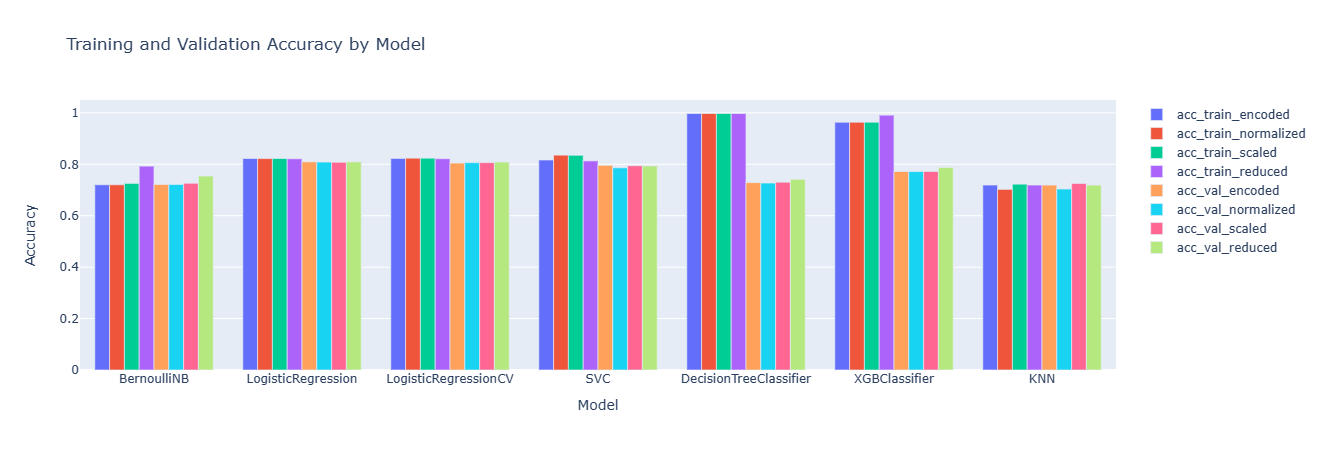

In [55]:
# Define the data
data = [
    go.Bar(x=merged_results['model'], y=merged_results['acc_train_encoded'], name='acc_train_encoded'),
    go.Bar(x=merged_results['model'], y=merged_results['acc_train_normalized'], name='acc_train_normalized'),
    go.Bar(x=merged_results['model'], y=merged_results['acc_train_scaled'], name='acc_train_scaled'),
    go.Bar(x=merged_results['model'], y=merged_results['acc_train_reduced'], name='acc_train_reduced'),
    go.Bar(x=merged_results['model'], y=merged_results['acc_val_encoded'], name='acc_val_encoded'),
    go.Bar(x=merged_results['model'], y=merged_results['acc_val_normalized'], name='acc_val_normalized'),
    go.Bar(x=merged_results['model'], y=merged_results['acc_val_scaled'], name='acc_val_scaled'),
    go.Bar(x=merged_results['model'], y=merged_results['acc_val_reduced'], name='acc_val_reduced')
]

# Define the layout
layout = go.Layout(
    title='Training and Validation Accuracy by Model',
    xaxis=dict(title='Model'),
    yaxis=dict(title='Accuracy')
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Plot the figure
iplot(fig)

**From the previous experiments the best model is `logistic regression`**

- Normalization and scaling doess not have a big effect on the data

- The best performance came from normal encoded data with reduced features (Because it quicks the training)

**Grid search `decision tree`**

In [56]:
# Define the parameters frid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter':['best','random'],
    'max_depth': list(range(1, 30))
}

# Define the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Grid search for best model parameters
dt_grid_search = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')

# Fitting the decision tree grid search
dt_grid_search.fit(x_train_red, y_train_classification)

# Get the best parameters
print("Best Parameters: ", dt_grid_search.best_params_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'splitter': 'best'}


In [57]:
# The best decision tree model
dt_best_clf = DecisionTreeClassifier(max_depth=2, random_state=42,
                                criterion = 'gini', max_features = None,
                                splitter ='best'
                               )

# Evaluate it
evaluate_model(dt_best_clf, x_train_red, y_train_classification, x_val_red, y_val_classification)

(0.8148839690584155, 0.7928)

**Ensemble learning `Random forest`**

#estimators:10 training accuracy: 0.7994131768471593  validation accuracy: 0.7768

#estimators:50 training accuracy: 0.7975460122699386  validation accuracy: 0.7792

#estimators:100 training accuracy: 0.7903440917578021  validation accuracy: 0.7736

#estimators:200 training accuracy: 0.7924779941317684  validation accuracy: 0.7736

#estimators:300 training accuracy: 0.7951453720992264  validation accuracy: 0.7768

#estimators:400 training accuracy: 0.7924779941317684  validation accuracy: 0.7736

#estimators:500 training accuracy: 0.7922112563350227  validation accuracy: 0.7744



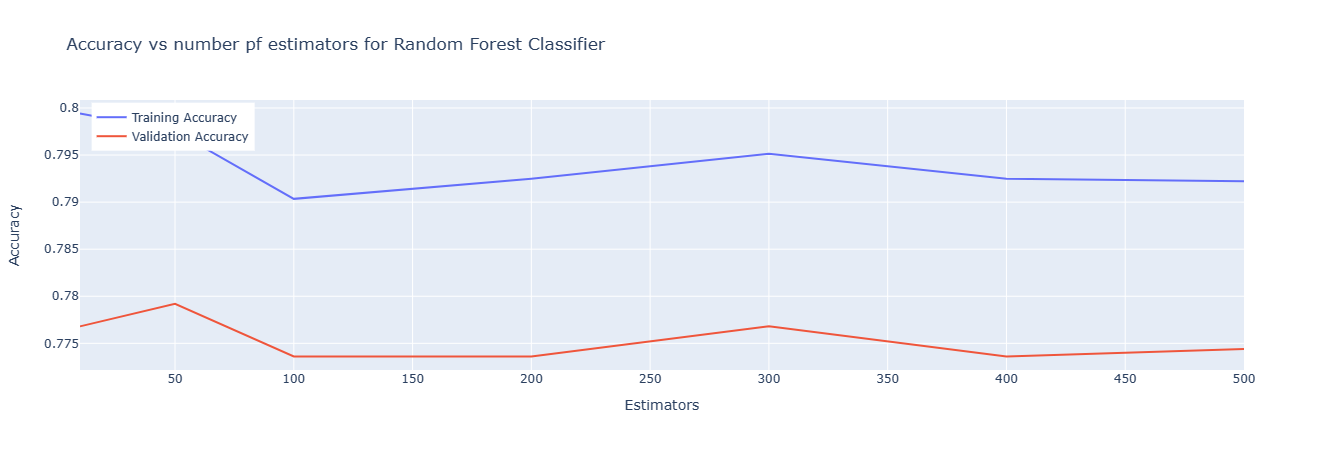

In [58]:
n_estimators_values = [10, 50, 100, 200, 300, 400, 500]

acc_train_values = []
acc_val_values = []

for n_estimators in n_estimators_values:
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=3, random_state=0, n_jobs=-1) # Use all valiable CPU
    acc_train, acc_val = evaluate_model(model, x_train_red, y_train_classification, x_val_red, y_val_classification)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    print(f'#estimators:{n_estimators} training accuracy: {acc_train}  validation accuracy: {acc_val}\n')
    
results = pd.DataFrame({
    'n_estimators': n_estimators_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

fig = go.Figure()
fig.add_trace(go.Scatter(x=results['n_estimators'], y=results['acc_train'], mode='lines', name='Training Accuracy'))
fig.add_trace(go.Scatter(x=results['n_estimators'], y=results['acc_val'], mode='lines', name='Validation Accuracy'))
fig.update_layout(
    title='Accuracy vs number pf estimators for Random Forest Classifier',
    xaxis=dict(title='Estimators'),
    yaxis=dict(title='Accuracy'),
    legend=dict(x=0.01, y=0.99),
)
fig.show()

#max_depth:1 training accuracy: 0.767938116831155  validation accuracy: 0.7488

#max_depth:2 training accuracy: 0.767938116831155  validation accuracy: 0.7488

#max_depth:3 training accuracy: 0.7975460122699386  validation accuracy: 0.7792

#max_depth:4 training accuracy: 0.8151507068551613  validation accuracy: 0.7832

#max_depth:5 training accuracy: 0.8362229927980794  validation accuracy: 0.7944

#max_depth:6 training accuracy: 0.8447586022939451  validation accuracy: 0.8008

#max_depth:7 training accuracy: 0.8596959189117098  validation accuracy: 0.7984

#max_depth:8 training accuracy: 0.8786343024806615  validation accuracy: 0.7976

#max_depth:9 training accuracy: 0.9007735396105628  validation accuracy: 0.8064

#max_depth:10 training accuracy: 0.9255801547079221  validation accuracy: 0.8032

#max_depth:11 training accuracy: 0.9543878367564684  validation accuracy: 0.7904

#max_depth:12 training accuracy: 0.9674579887970125  validation accuracy: 0.8032

#max_depth:13 training accu

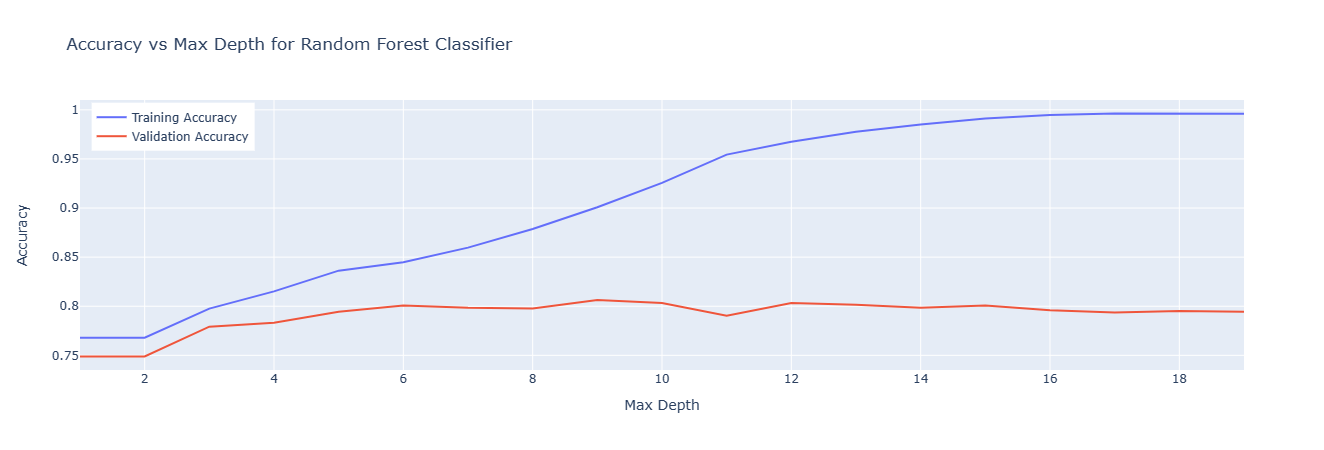

In [59]:
max_depth_values = list(range(1, 20))
acc_train_values = []
acc_val_values = []

for max_depth in max_depth_values:
    model = RandomForestClassifier(n_estimators=50, max_depth=max_depth, random_state=0, n_jobs=-1) # Use all valiable CPU
    acc_train, acc_val = evaluate_model(model, x_train_red, y_train_classification, x_val_red, y_val_classification)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    print(f'#max_depth:{max_depth} training accuracy: {acc_train}  validation accuracy: {acc_val}\n')
    
results = pd.DataFrame({
    'max_depth': max_depth_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})
    
fig = go.Figure()
fig.add_trace(go.Scatter(x=results['max_depth'], y=results['acc_train'], mode='lines', name='Training Accuracy'))
fig.add_trace(go.Scatter(x=results['max_depth'], y=results['acc_val'], mode='lines', name='Validation Accuracy'))
fig.update_layout(
    title='Accuracy vs Max Depth for Random Forest Classifier',
    xaxis=dict(title='Max Depth'),
    yaxis=dict(title='Accuracy'),
    legend=dict(x=0.01, y=0.99),
)
fig.show()

In [60]:
rf_best = RandomForestClassifier(n_estimators=50, max_depth=9, random_state=0)

evaluate_model(rf_best, x_train_norm, y_train_classification, x_val_norm, y_val_classification)

(0.876767137903441, 0.7936)

**Ensemble learning `bagging classifier`**

In [61]:
"""
n_estimators=100  : 100 logistic regression classifiers will be trained.
n_jobs=-1 : To use all availble CPU
bootstrap= True  : Specifies whether samples are drawn with replacement
max_samples=0.75  : 75% of the original dataset will be randomly sampled with replacement for each classifier.
random_state=42  : To maintain consistency
"""
bag_clf = BaggingClassifier(
    LogisticRegression(), n_estimators=100,
    max_samples=0.75, bootstrap= True, random_state=42
)

# Train the bagging classifier
evaluate_model(bag_clf, x_train_red, y_train_classification, x_val_red, y_val_classification)

(0.821018938383569, 0.8104)

**Ensemble learning `Hard voting classifier` for best estimators**

In [62]:
# Best models found odd number of them for binary class labels
best_estimators = [
    ('LogisticRegression', LogisticRegression()),
    ('RandomForestClassifier', RandomForestClassifier(n_estimators=50, max_depth=8, random_state=0)),
    ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=2, random_state=42, criterion = 'gini', max_features = None, splitter ='best')),
    ('LogisticRegressionCV', LogisticRegressionCV()),
    ('SCV', SVC())
]

In [63]:
# Hard voting classifier object with best estimators
voting_clf = VotingClassifier(
    best_estimators,
    voting='hard'
)

# Train the voting classifier
evaluate_model(voting_clf, x_train_red, y_train_classification, x_val_red, y_val_classification)

(0.8404907975460123, 0.7992)

**The best classifier is `Bagging` classifier from ensemble learning**
- Training accuracy: 0.82102
- Validation accuracy: 0.8104

# <font color='orange'>8. Classification best results</font>

              precision    recall  f1-score   support

          no       0.84      0.93      0.88       675
         yes       0.66      0.44      0.53       208

    accuracy                           0.81       883
   macro avg       0.75      0.69      0.71       883
weighted avg       0.80      0.81      0.80       883



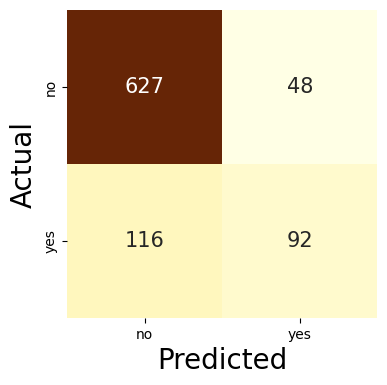

In [64]:
# Make prediction about test data
pred = bag_clf.predict(x_test_red)

# Classes in the dataset
target_names = list(lbl_encoder.classes_)

# Calculate the classification report
report = classification_report(y_test_classification, pred, target_names=target_names, digits=2)
print(report)

# Display the confusion matrix
disp = confusion_matrix(y_test_classification, pred)
disp.astype('int')
pd.options.display.float_format='{:.5f}'.format
df_cm = pd.DataFrame(disp, target_names, target_names)
fig, ax = plt.subplots(figsize=(4,4))
sns.set(font_scale=1.5) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size":15},ax=ax, cmap="YlOrBr", fmt='g',cbar=False) #font
plt.ylabel('Actual',fontsize=20)
plt.xlabel('Predicted',fontsize=20)
plt.ioff()
plt.savefig("confusion_mat", bbox_inches='tight')
plt.show()

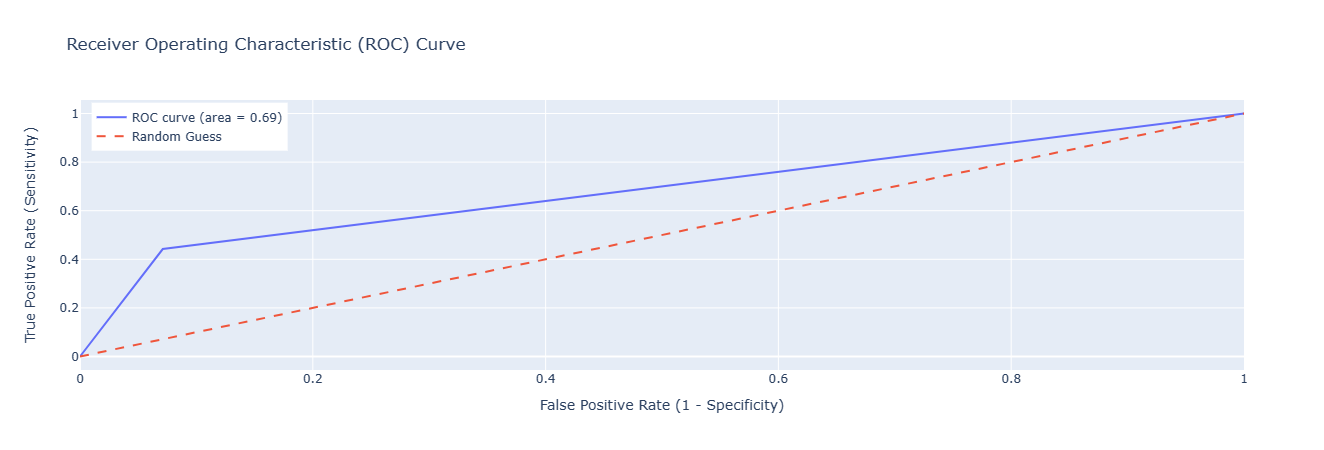

In [65]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_classification, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC curve (area = %0.2f)' % roc_auc))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guess', line=dict(dash='dash')))
fig.update_layout(
    title='Receiver Operating Characteristic (ROC) Curve',
    xaxis=dict(title='False Positive Rate (1 - Specificity)'),
    yaxis=dict(title='True Positive Rate (Sensitivity)'),
    legend=dict(x=0.01, y=0.99),
)
fig.show()

In [66]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_classification, pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.4423076923076923
Specificity: 0.9288888888888889


# <font color='orange'>9. Training regression models</font>

**This plot helps in visually assessing how well the model's predictions align with the actual values across the range of the data. If the points are closely clustered around the red dashed line, it indicates that the model's predictions are accurate. On the other hand, if there's a significant spread or pattern in the points, it suggests areas where the model may need improvement or further investigation.**

In [67]:
def plot_regression_predictions(y_test, y_pred, title="Predictions vs. Actual"):
    """
    
    """
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=y_test, y=y_pred, 
                             mode='markers', marker=dict(opacity=0.5), 
                             name='Predictions vs. Actual'))
    
    fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], 
                             y=[min(y_test), max(y_test)], 
                             mode='lines', line=dict(color='red', dash='dash'), name='Ideal Line'))
    
    fig.update_layout(
        title=title,
        xaxis=dict(title="Actual Values"),
        yaxis=dict(title="Predicted Values"),
    )
    
    fig.show()

**To calculate all required regression metrices `(Mean AE, Mean SE, Median AE, r2_score)`**

In [68]:
def calculate_regression_metrics(y_test, y_pred):
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Median Absolute Error (MedAE)
    medae = np.median(np.abs(y_test - y_pred))
    
    # R^2 Score
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, medae, r2

**Training models**

In [69]:
# Make a result dictionary to hold results for normal encoded data
results_encoded = {
    'lr_model_degree': [],
    'mae_train': [],
    'mae_val': [],
    'mse_train': [],
    'mse_val': [],
    'medae_train': [],
    'medae_val': [],
    'r2_train': [],
    'r2_val':[],
}

Degree of linear regression model is: 1
MAE train: 566.4058856261297, MAE validation: 550.0349228141976
MSE train: 494547.87753820076, MSE validation: 469583.57472038537
MedAE train: 489.3948270200044, MedAE validation: 460.6767355204155
r2 train: 0.8974225250454941, r2 validation: 0.9015339013693677
--------------------


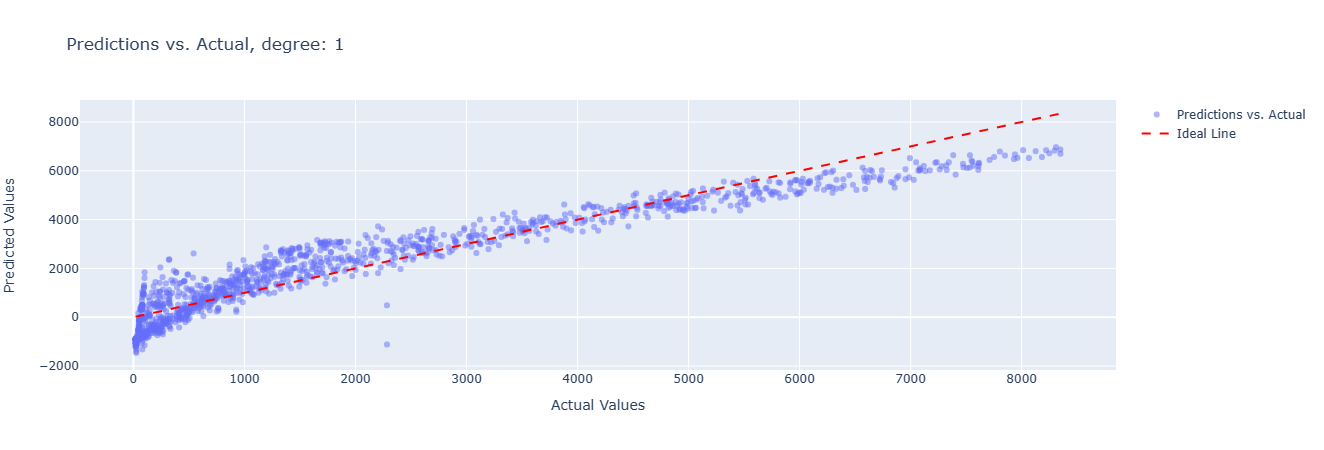

Degree of linear regression model is: 2
MAE train: 58.88689243897296, MAE validation: 59.88332741921417
MSE train: 13405.065999990515, MSE validation: 13306.976566618085
MedAE train: 37.68693237304683, MedAE validation: 40.590023803711034
r2 train: 0.9972195658209628, r2 validation: 0.9972096850536897
--------------------


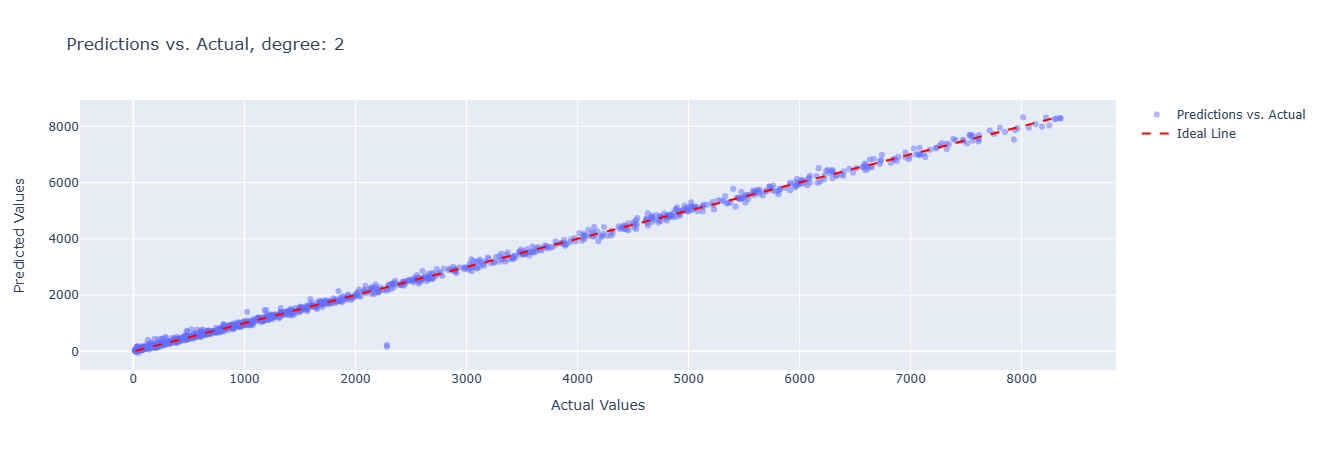

Degree of linear regression model is: 3
MAE train: 47.04559885472838, MAE validation: 83.2881040784585
MSE train: 7058.95307214291, MSE validation: 19962.260878735622
MedAE train: 32.64104193841331, MedAE validation: 57.052462451934105
r2 train: 0.9985358554452458, r2 validation: 0.9958141509746238
--------------------


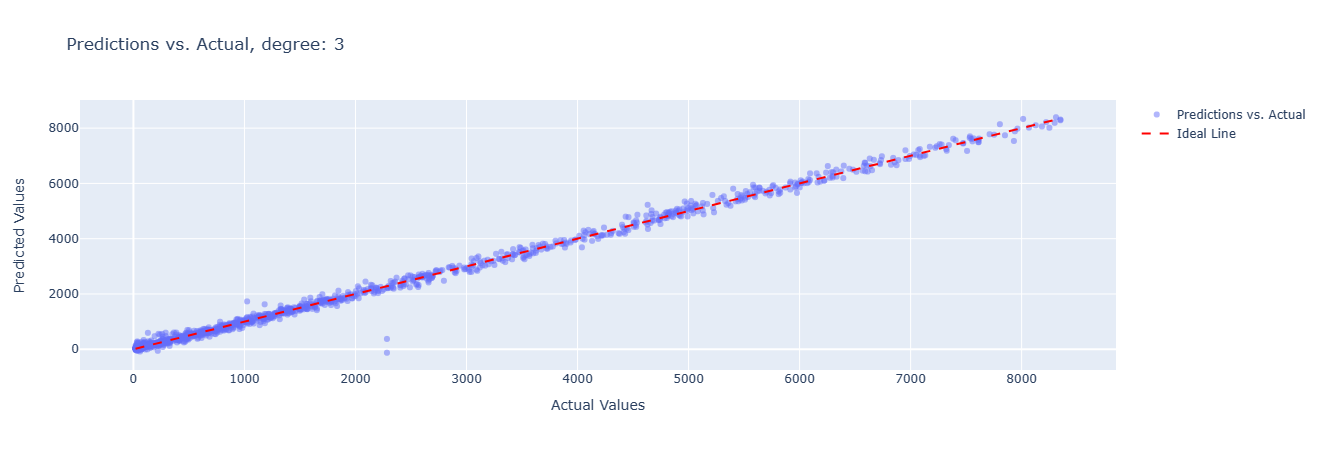

In [70]:
# Model degrees
degrees = list(np.arange(1, 4)) #[1:3]

for degree in (degrees):
    
    # Make a pipeline for the model to find the best degree of polynomial equation
    reger = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Train the model on the training data 
    reger.fit(x_train_encoded, y_train_regression)
    
    # Inference model on train data
    y_pred_train = reger.predict(x_train_encoded)
    
    # Calculte metrics on train data
    mae_train, mse_train, medae_train, r2_train = calculate_regression_metrics(y_train_regression, y_pred_train)
    
    # Inference model on validation data
    y_pred_val = reger.predict(x_val_encoded)
    
    # Calculte metrics on validation data
    mae_val, mse_val, medae_val, r2_val = calculate_regression_metrics(y_val_regression, y_pred_val)
    
    print(f'Degree of linear regression model is: {degree}')
    
    print(f'MAE train: {mae_train}, MAE validation: {mae_val}')
    print(f'MSE train: {mse_train}, MSE validation: {mse_val}')
    print(f'MedAE train: {medae_train}, MedAE validation: {medae_val}')
    print(f'r2 train: {r2_train}, r2 validation: {r2_val}')
    
    print('-'*20)
    
    # Plotting realtionship between actual and predicted variables
    plot_regression_predictions(y_val_regression, y_pred_val,title= f"Predictions vs. Actual, degree: {degree}" )
    
    # Save training results
    results_encoded['lr_model_degree'].append(degree)
    results_encoded['mae_train'].append(mae_train)
    results_encoded['mae_val'].append(mae_val)
    results_encoded['mse_train'].append(mse_train)
    results_encoded['mse_val'].append(mse_val)
    results_encoded['medae_train'].append(medae_train)
    results_encoded['medae_val'].append(medae_val)
    results_encoded['r2_train'].append(r2_train)
    results_encoded['r2_val'].append(r2_val)

**Visualize model performance against r2 score**

In [71]:
# Make a data frame for linear regression degrees with train and validation r2-score
results_df = pd.DataFrame(
{
    'lr_model_degree': results_encoded['lr_model_degree'],
    'r2_train': results_encoded['r2_train'],
    'r2_val': results_encoded['r2_val']
})

# Sort them models based on validation r2-scor
results_df = results_df.sort_values(by='r2_val', ascending=False, ignore_index=True)

# Display the results dataframe
results_df

lr_model_degree  r2_train  r2_val
0                2   0.99722 0.99721
1                3   0.99854 0.99581
2                1   0.89742 0.90153

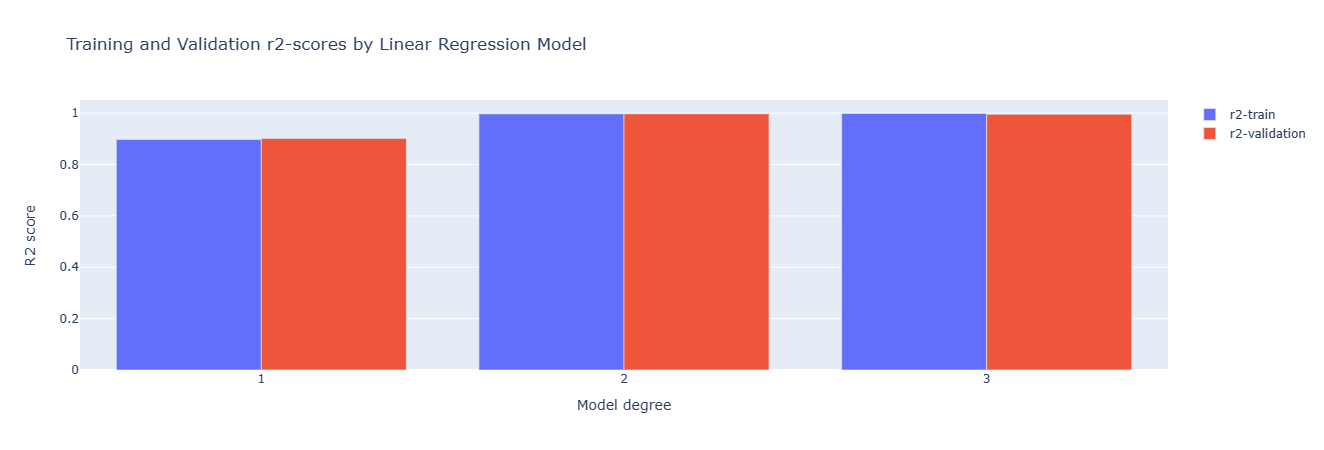

In [72]:
# Define the data
data = [
    go.Bar(x=results_df['lr_model_degree'], y=results_df['r2_train'], name='r2-train'),
    go.Bar(x=results_df['lr_model_degree'], y=results_df['r2_val'], name='r2-validation'),
]

# Define the layout
layout = go.Layout(
    title='Training and Validation r2-scores by Linear Regression Model',
    xaxis=dict(title='Model degree'),
    yaxis=dict(title='R2 score')
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Plot the figure
iplot(fig)

**The best model degree is `2`**

Evaluate best model on `test` data

In [73]:
# Make a pipeline for the model to find the best degree of polynomial equation
best_reger = make_pipeline(PolynomialFeatures(2), LinearRegression())

# Train the model on training data
best_reger.fit(x_train_encoded, y_train_regression)

# Inference model on test data
y_pred = best_reger.predict(x_test_encoded)

# Calculte metrics on validation data
mae_test, mse_test, medae_test, r2_test = calculate_regression_metrics(y_test_regression, y_pred)

print(f'MAE test: {mae_test}')
print(f'MSE test: {mse_test}')
print(f'MedAE test: {medae_test}')
print(f'r2 test: {r2_test}')

MAE test: 62.44105509394023
MSE test: 7670.330856772684
MedAE test: 42.17598266601567
r2 test: 0.9985133986059475


# <font color='orange'>10. Clustering</font>

**Apply K-Means Clustering**

In [74]:
# Create an object from KMeans
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model on training data
kmeans.fit(x_train_encoded)

# Get the predicted clusters
predicted_clusters = kmeans.labels_

**Dimensionality reduction for better visualisation using `TSNE` t-Distributed Stochastic Neighbor Embedding**

t-SNE is preferable when:
- You are primarily interested in visualizing data to identify clusters and local data structures.
- The data contains complex, non-linear relationships that PCA might miss.
- You do not require the dimensions themselves to be interpretable.

In [75]:
# Create an object from t-Distributed Stochastic Neighbor Embedding
tsne = TSNE(n_components=2, random_state=42)

# Transform data (reduce dimension)
x_train_tsne  = tsne.fit_transform(x_train_encoded)

In [76]:
x_train_tsne.shape

(3749, 2)

**Visualization**

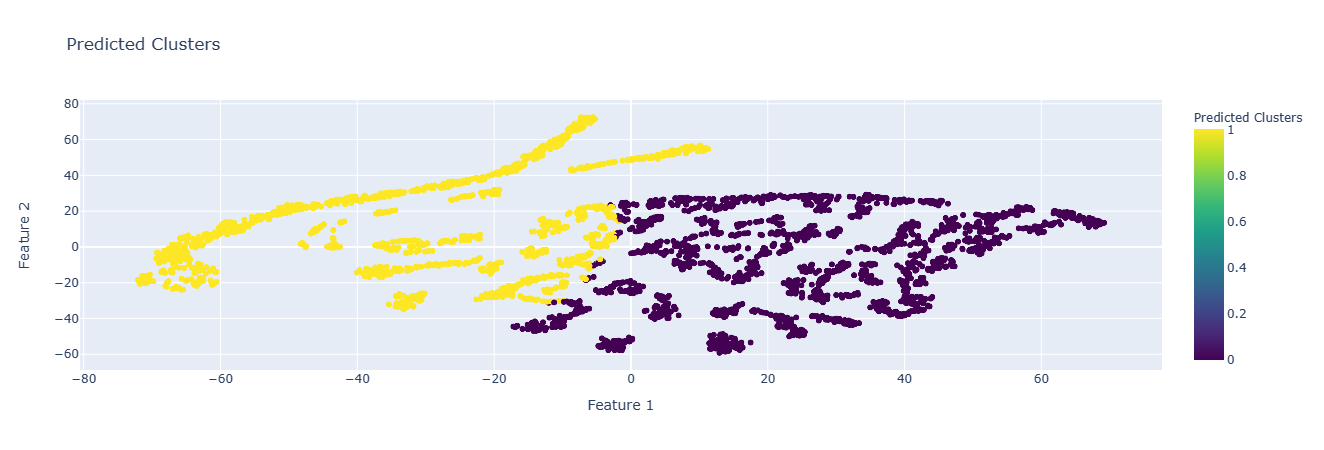

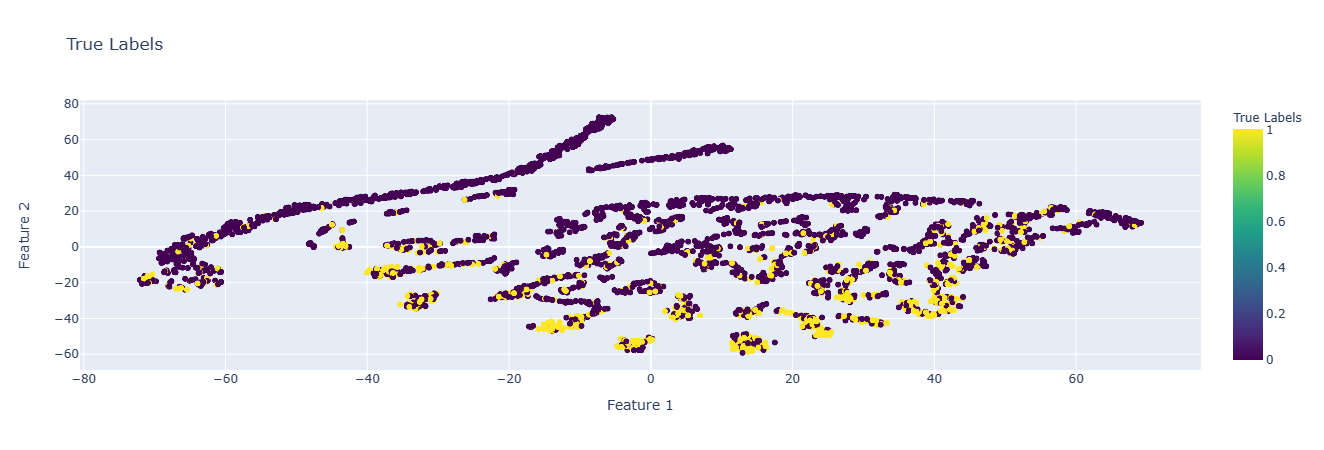

In [77]:
# Prepare data
df_tsne = pd.DataFrame(x_train_tsne, columns=['Feature 1', 'Feature 2'])
df_tsne['Predicted Clusters'] = predicted_clusters
df_tsne['True Labels'] = y_train_classification

# Plotting the predicted clusters
fig1 = px.scatter(df_tsne, x='Feature 1', y='Feature 2', color='Predicted Clusters',
                  color_continuous_scale=px.colors.sequential.Viridis, labels={'color': 'Predicted Cluster'},
                  title='Predicted Clusters')
fig1.update_layout(coloraxis_colorbar=dict(title="Predicted Clusters"))
fig1.show()

# Plotting the true labels
fig2 = px.scatter(df_tsne, x='Feature 1', y='Feature 2', color='True Labels',
                  color_continuous_scale=px.colors.sequential.Viridis, labels={'color': 'True Label'},
                  title='True Labels')
fig2.update_layout(coloraxis_colorbar=dict(title="True Labels"))
fig2.show()

**Apply Elbow-Methhod to get the optimal clusters for data**

- This method calculata variance between clusters to find the best number of clusters
- Tnertia (sum of squared distances to the nearest cluster center) for different numbers of clusters in KMeans clustering.

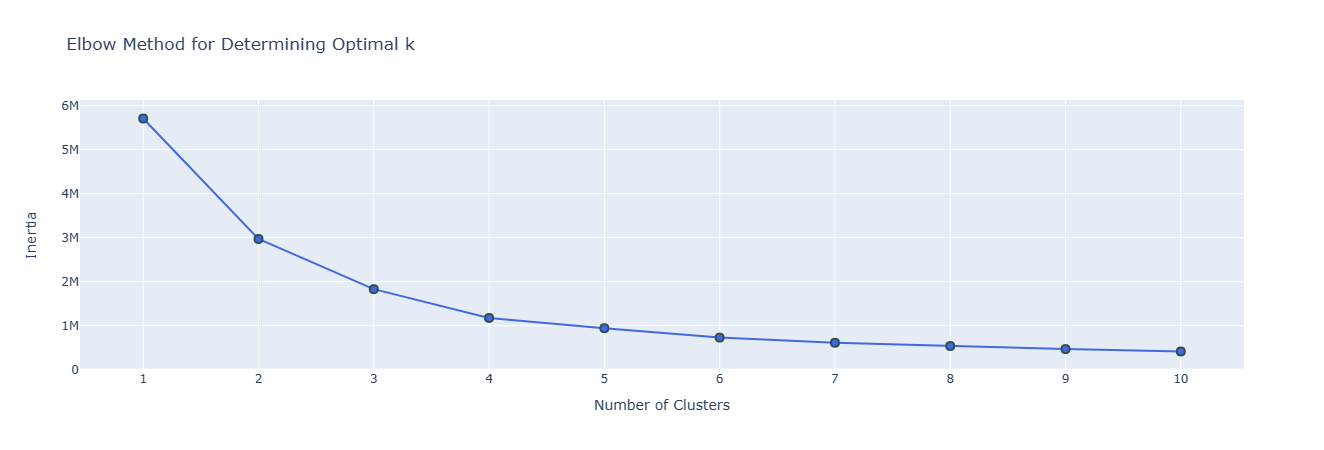

In [78]:
# To hold the kmeans interia
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_train_encoded)
    inertias.append(kmeans.inertia_)
    
# Creating the figure
fig = go.Figure()

# Adding the line plot
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=inertias,
                         mode='lines+markers',
                         marker=dict(color='RoyalBlue', size=8, line=dict(color='DarkSlateGrey', width=2)),
                         line=dict(color='RoyalBlue')))

# Adding titles and labels
fig.update_layout(title='Elbow Method for Determining Optimal k',
                  xaxis_title='Number of Clusters',
                  yaxis_title='Inertia',
                  xaxis=dict(tickmode='linear', tick0=1, dtick=1))

# Show the plot
fig.show()